<a href="https://colab.research.google.com/github/pmama/DeepLearningConcepts/blob/main/IMDB_RNN_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis (Many to one RNN)**

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.utils import plot_model
from keras.utils import pad_sequences

# **Loading Data**

In [2]:
from keras.datasets import imdb
num_words = 10000
#(x_train,y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)
(x_train, y_train), (x_test,y_test) = imdb.load_data()

In [3]:
print(' Training shape: ' , x_train.shape, y_train.shape)
print(' Test shape: ' , x_test.shape, y_test.shape)

 Training shape:  (25000,) (25000,)
 Test shape:  (25000,) (25000,)


In [4]:
print('Review :', x_train[0])
print('Label:', y_train[0])

Review : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label: 1


In [5]:

word_index = imdb.get_word_index()
first_20_items = (list(word_index.items()))[:20]
for item in first_20_items:
  print(item)

('fawn', 34701)
('tsukino', 52006)
('nunnery', 52007)
('sonja', 16816)
('vani', 63951)
('woods', 1408)
('spiders', 16115)
('hanging', 2345)
('woody', 2289)
('trawling', 52008)
("hold's", 52009)
('comically', 11307)
('localized', 40830)
('disobeying', 30568)
("'royale", 52010)
("harpo's", 40831)
('canet', 52011)
('aileen', 19313)
('acurately', 52012)
("diplomat's", 52013)


In [6]:
np.array(x_train.max()).max()

88325

In [7]:
print(x_train[5])
print(len(x_train[5]))

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 43222, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 86588, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 15344, 10, 10]
43


In [8]:
for ix in range(11):
  print(f'length Timesteps:{ix}', len(x_train[ix]))

length Timesteps:0 218
length Timesteps:1 189
length Timesteps:2 141
length Timesteps:3 550
length Timesteps:4 147
length Timesteps:5 43
length Timesteps:6 123
length Timesteps:7 562
length Timesteps:8 233
length Timesteps:9 130
length Timesteps:10 450


It is a preprocessed data. As the tokonization is done.
But, The input length is different. So Padding is required.

In [9]:
max_len=[]
for ix in range(x_train.shape[0]):
  #print(f'length Timesteps:{ix}', len(x_train[ix]))
  max_len.append(len(x_train[ix]))
time_step = np.array(max_len).max()
time_step # total vocab in the longest sentence.

2494

In [10]:
# For fixed input length Padding Required
from keras.utils import pad_sequences
x_train = pad_sequences(x_train, padding='post')
x_test  = pad_sequences(x_test, padding='post')
for ix in range(11):
  print(f'length Timesteps:{ix}', len(x_train[ix]))

length Timesteps:0 2494
length Timesteps:1 2494
length Timesteps:2 2494
length Timesteps:3 2494
length Timesteps:4 2494
length Timesteps:5 2494
length Timesteps:6 2494
length Timesteps:7 2494
length Timesteps:8 2494
length Timesteps:9 2494
length Timesteps:10 2494


For tasks like text classification or sentiment analysis, shorter sequences might be adequate. So We can do reduction for simplicity. We will loose information.

*Real Time not advisible

In [11]:
new_time_step =200
x_train = pad_sequences(x_train, padding='post', maxlen= new_time_step)
x_test  = pad_sequences(x_test, padding='post', maxlen= new_time_step)
for ix in range(11):
  print(f'length Timesteps:{ix}', len(x_train[ix]))

length Timesteps:0 200
length Timesteps:1 200
length Timesteps:2 200
length Timesteps:3 200
length Timesteps:4 200
length Timesteps:5 200
length Timesteps:6 200
length Timesteps:7 200
length Timesteps:8 200
length Timesteps:9 200
length Timesteps:10 200


In [12]:
word_index = imdb.get_word_index()
len(word_index)


88584

In [13]:
len(x_train[0])

200

<Axes: xlabel='0'>

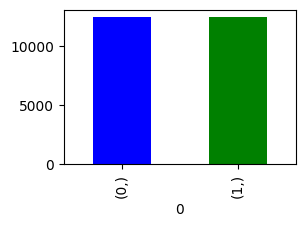

In [14]:
pd.DataFrame(y_train).value_counts().plot(kind='bar', color=['blue','green'], figsize=(3,2))

# **Approach : 1 (Simple RNN using Integer Coding)**

In [15]:
timesteps = len(x_train[0])
max_vocab = num_words
print('Timesteps :',timesteps )
print('Maximum vocabs :',num_words )

Timesteps : 200
Maximum vocabs : 10000


In [16]:
# Simple RNN
model = Sequential([
    SimpleRNN(8, input_shape=(timesteps,1), return_sequences=False),
    # This is Many to one RNN problem: Sentiment Analysis -
    # 'return_sequences=False', Desired Output is only at the end.
    Dense(1,activation ='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 80        
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 89 (356.00 Byte)
Trainable params: 89 (356.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics =['accuracy'] )
history = model.fit(x_train, y_train, batch_size=128,epochs = 5, validation_data = (x_test,y_test))

Epoch 1/5
196/196 [==============================] - 31s 141ms/step - loss: 0.6933 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.5001
Epoch 2/5
196/196 [==============================] - 24s 124ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
196/196 [==============================] - 25s 129ms/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
196/196 [==============================] - 25s 128ms/step - loss: 0.6932 - accuracy: 0.4948 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
196/196 [==============================] - 25s 126ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.5000


<Axes: >

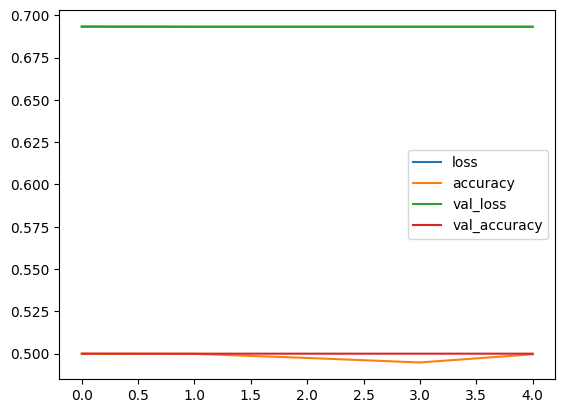

In [18]:
rnn_history =pd.DataFrame(model.history.history)
rnn_history.plot()

# **Approach-2: (Simple RNN using Embedding)**

In [19]:
num_words = 10000
maxlen = 100
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [20]:
model_em = Sequential([
    Embedding( num_words, 32, input_length=maxlen),
    SimpleRNN(8, return_sequences= False),
    Dense(1,activation ='sigmoid')
])
model_em.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 328       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 320337 (1.22 MB)
Trainable params: 320337 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model_em.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = model_em.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))

Epoch 1/5
782/782 [==============================] - 100s 125ms/step - loss: 0.5648 - accuracy: 0.6994 - val_loss: 0.4567 - val_accuracy: 0.7998
Epoch 2/5
782/782 [==============================] - 79s 101ms/step - loss: 0.3541 - accuracy: 0.8558 - val_loss: 0.4117 - val_accuracy: 0.8220
Epoch 3/5
782/782 [==============================] - 79s 101ms/step - loss: 0.2477 - accuracy: 0.9070 - val_loss: 0.4144 - val_accuracy: 0.8304
Epoch 4/5
782/782 [==============================] - 80s 103ms/step - loss: 0.1711 - accuracy: 0.9420 - val_loss: 0.4523 - val_accuracy: 0.8200
Epoch 5/5
782/782 [==============================] - 77s 98ms/step - loss: 0.1242 - accuracy: 0.9611 - val_loss: 0.5009 - val_accuracy: 0.8159


<Axes: >

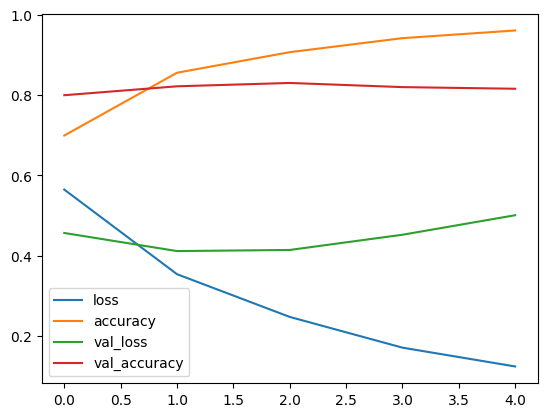

In [25]:
rnn_history =pd.DataFrame(model_em.history.history)
rnn_history.plot()

# **Approach-3: LSTM(Long Short Term Memory)**

In [23]:
num_words = 10000
maxlen = 100
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [26]:
lstm = Sequential([
    Embedding( num_words, 32, input_length=maxlen),
    LSTM(5, return_sequences= False),  # In Deep RNN we need all outputs.
    Dense(1,activation ='sigmoid')
])
lstm.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = lstm.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))

Epoch 1/5
782/782 [==============================] - 33s 39ms/step - loss: 0.4865 - accuracy: 0.7759 - val_loss: 0.3929 - val_accuracy: 0.8336
Epoch 2/5
782/782 [==============================] - 12s 15ms/step - loss: 0.3026 - accuracy: 0.8795 - val_loss: 0.3813 - val_accuracy: 0.8348
Epoch 3/5
782/782 [==============================] - 9s 12ms/step - loss: 0.2207 - accuracy: 0.9195 - val_loss: 0.3815 - val_accuracy: 0.8427
Epoch 4/5
782/782 [==============================] - 10s 12ms/step - loss: 0.1679 - accuracy: 0.9408 - val_loss: 0.4071 - val_accuracy: 0.8387
Epoch 5/5
782/782 [==============================] - 10s 13ms/step - loss: 0.1307 - accuracy: 0.9563 - val_loss: 0.4426 - val_accuracy: 0.8348


<Axes: >

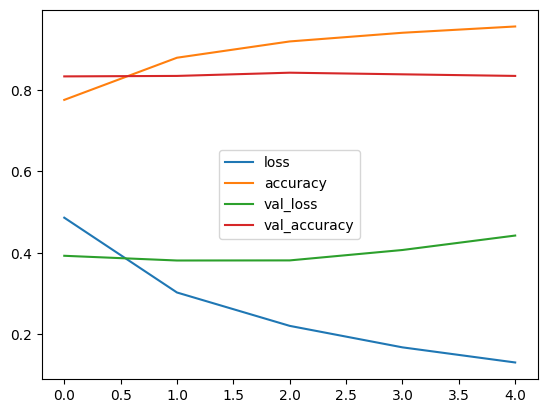

In [27]:
rnn_history =pd.DataFrame(lstm.history.history)
rnn_history.plot()

# **Approach-4: GRU(Gated Recurrent Unit)**

In [28]:
gru = Sequential([
    Embedding( num_words, 32, input_length=maxlen),
    GRU(5, return_sequences= False),  # In Deep RNN we need all outputs.
    Dense(1,activation ='sigmoid')
])
gru.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = gru.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))

Epoch 1/5
782/782 [==============================] - 26s 30ms/step - loss: 0.5243 - accuracy: 0.7385 - val_loss: 0.4944 - val_accuracy: 0.7722
Epoch 2/5
782/782 [==============================] - 11s 14ms/step - loss: 0.3362 - accuracy: 0.8645 - val_loss: 0.3739 - val_accuracy: 0.8397
Epoch 3/5
782/782 [==============================] - 12s 16ms/step - loss: 0.2534 - accuracy: 0.9051 - val_loss: 0.3766 - val_accuracy: 0.8394
Epoch 4/5
782/782 [==============================] - 9s 12ms/step - loss: 0.2033 - accuracy: 0.9261 - val_loss: 0.3976 - val_accuracy: 0.8430
Epoch 5/5
782/782 [==============================] - 8s 11ms/step - loss: 0.1595 - accuracy: 0.9456 - val_loss: 0.4361 - val_accuracy: 0.8365


<Axes: >

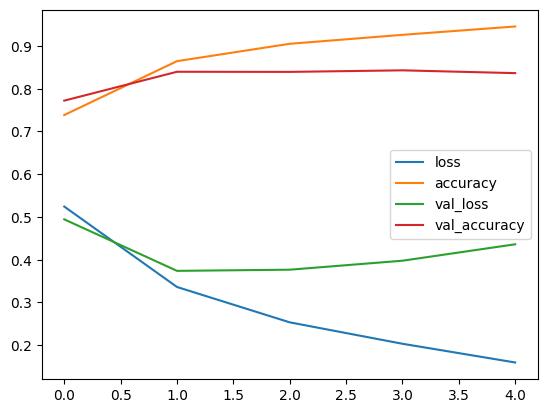

In [29]:
rnn_history =pd.DataFrame(gru.history.history)
rnn_history.plot()

# **Deep RNN**

In [30]:
deep_rnn = Sequential([
    Embedding( num_words, 32, input_length=maxlen),
    SimpleRNN(5, return_sequences= True),  # In Deep RNN we need all outputs.
    SimpleRNN(5),
    Dense(1,activation ='sigmoid')
])
deep_rnn.summary()
deep_rnn.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = deep_rnn.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 32)           320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100, 5)            190       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320251 (1.22 MB)
Trainable params: 320251 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
782/782 [==============================] - 177s 224ms/step - loss: 0.6312 - accuracy: 0.6251 - val_loss: 0.5197 - val_accuracy: 0.7569
Epoch

<Axes: >

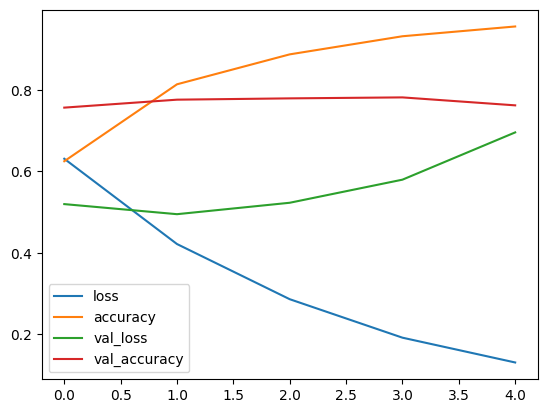

In [31]:
rnn_history =pd.DataFrame(deep_rnn.history.history)
rnn_history.plot()

# **Deep LSTM**

In [32]:
deep_lstm = Sequential([
    Embedding( num_words, 32, input_length=maxlen),
    LSTM(5, return_sequences= True),  # In Deep RNN we need all outputs.
    LSTM(5),
    Dense(1,activation ='sigmoid')
])
deep_lstm.summary()
deep_lstm.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history =deep_lstm.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm_2 (LSTM)               (None, 100, 5)            760       
                                                                 
 lstm_3 (LSTM)               (None, 5)                 220       
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320986 (1.22 MB)
Trainable params: 320986 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
782/782 [==============================] - 33s 37ms/step - loss: 0.4701 - accuracy: 0.7846 - val_loss: 0.3799 - val_accuracy: 0.8372
Epoch 2

<Axes: >

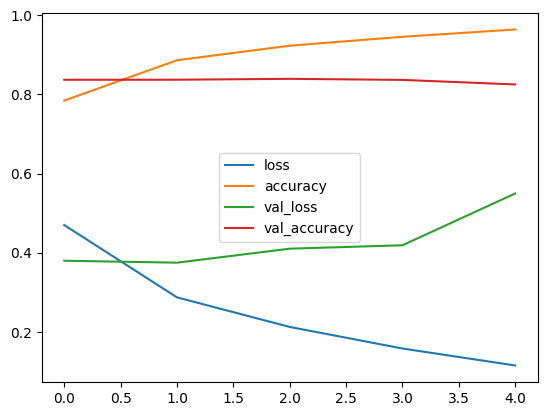

In [33]:
rnn_history =pd.DataFrame(deep_lstm.history.history)
rnn_history.plot()

# **Deep GRU**

In [34]:
deep_gru = Sequential([
    Embedding( num_words, 32, input_length=maxlen),
    GRU(5, return_sequences= True),  # In Deep RNN we need all outputs.
    GRU(5),
    Dense(1,activation ='sigmoid')
])
deep_gru.summary()
deep_gru.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = deep_gru.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 32)           320000    
                                                                 
 gru_1 (GRU)                 (None, 100, 5)            585       
                                                                 
 gru_2 (GRU)                 (None, 5)                 180       
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320771 (1.22 MB)
Trainable params: 320771 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
782/782 [==============================] - 31s 34ms/step - loss: 0.4688 - accuracy: 0.7704 - val_loss: 0.3614 - val_accuracy: 0.8441
Epoch 2

<Axes: >

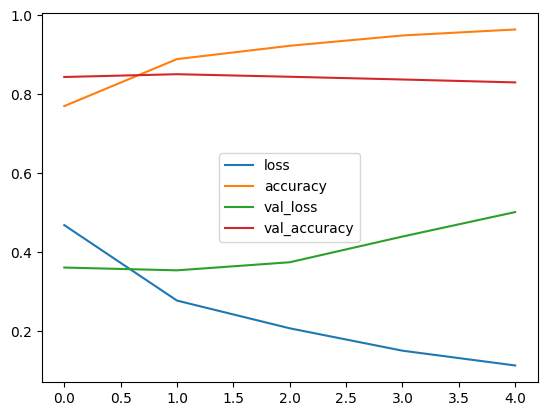

In [35]:
rnn_history =pd.DataFrame(deep_gru.history.history)
rnn_history.plot()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 32)           320000    
                                                                 
 dropout_6 (Dropout)         (None, 100, 32)           0         
                                                                 
 gru_9 (GRU)                 (None, 100, 5)            585       
                                                                 
 dropout_7 (Dropout)         (None, 100, 5)            0         
                                                                 
 gru_10 (GRU)                (None, 5)                 180       
                                                                 
 dropout_8 (Dropout)         (None, 5)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)               

<Axes: >

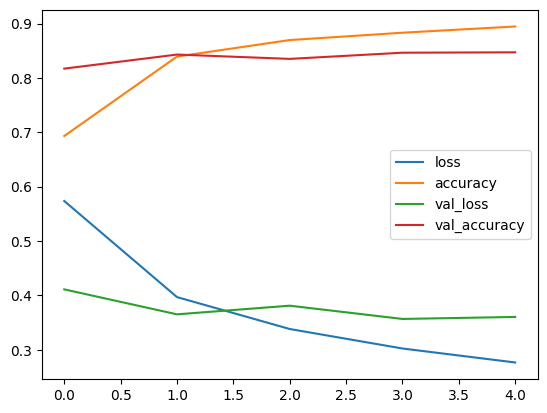

In [39]:
deep_gru1 = Sequential([
    Embedding( num_words, 32, input_length=maxlen),
    Dropout(0.5),
    GRU(5, return_sequences= True),  # In Deep RNN we need all outputs.
    Dropout(0.5),
    GRU(5),
    Dropout(0.5),
    Dense(1,activation ='sigmoid')
])
deep_gru1.summary()
deep_gru1.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = deep_gru1.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))
rnn_history =pd.DataFrame(deep_gru1.history.history)
rnn_history.plot()

# **Deep GRU with dropout and all timesteps**

In [ ]:
num_words = 10000
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = num_words)

In [7]:

x_train = pad_sequences(x_train)
x_test = pad_sequences(x_test)
maxlen = len(x_train[0])
maxlen

2494

In [ ]:
deep_gru2 = Sequential([
    Embedding( num_words, 32, input_length=maxlen),
    Dropout(0.5),
    GRU(5, return_sequences= True),  # In Deep RNN we need all outputs.
    Dropout(0.5),
    GRU(5),
    Dropout(0.5),
    Dense(1,activation ='sigmoid')
])
deep_gru2.summary()
deep_gru2.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = deep_gru2.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))
rnn_history =pd.DataFrame(deep_gru2.history.history)
rnn_history.plot()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2494, 32)          320000    
                                                                 
 dropout (Dropout)           (None, 2494, 32)          0         
                                                                 
 gru (GRU)                   (None, 2494, 5)           585       
                                                                 
 dropout_1 (Dropout)         (None, 2494, 5)           0         
                                                                 
 gru_1 (GRU)                 (None, 5)                 180       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 1)                 6